In [1]:
# 다른 요소들은 고정하고 손실함수 평균제곱오차 교차 엔트로피
# 신경망 만을 이용하여 손실함수 비교

In [2]:
import numpy as np
import tensorflow as  tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [3]:
# mnist를 읽어와서 신경망에 입력할 형태로 변환
(x_train,y_train),(x_test,y_test) = mnist.load_data()
# 표준화
x_train = x_train.astype(np.float16) / 255.0
x_test = x_test.astype(np.float16) / 255.0
# 차수변경
x_train = x_train.reshape(x_train.shape[0],-1)
x_test = x_test.reshape(x_test.shape[0],-1)
# 종속변수 one hot encording
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
# 신경망 구성을 위한 하이퍼매개변수
n_input = 784
n_hidden1,n_hidden2,n_hidden3,n_hidden4 = 1024,512,512,512
n_output = 10

In [5]:
# 두개의 신경망 모델을 생성
# 손실함수 mse / mean_squared_error
# 손실함수 categorical_crossentropy  

In [15]:
def build_model(loss = tf.keras.losses.categorical_crossentropy, optimizer = Adam):
  model = Sequential()
  model.add(Dense(n_hidden1,activation='relu'))
  model.add(Dense(n_hidden2,activation='relu'))
  model.add(Dense(n_hidden3,activation='relu'))
  model.add(Dense(n_hidden4,activation='relu'))
  model.add(Dense(n_output,activation='softmax'))  
  model.compile(loss = loss,optimizer=optimizer,metrics=['accuracy'])
  return model

In [7]:
mse_model = build_model(tf.keras.losses.mean_squared_error)
cat_model = build_model(tf.keras.losses.categorical_crossentropy)

In [12]:
mse_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              803840    
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dense_3 (Dense)             (None, 512)               262656    
                                                                 
 dense_4 (Dense)             (None, 10)                5130      
                                                                 
Total params: 1,859,082
Trainable params: 1,859,082
Non-trainable params: 0
_________________________________________________________________


In [8]:
# 학습
mse_model_hist = mse_model.fit(x_train,y_train,batch_size=128,epochs=30,validation_data=[x_test,y_test]) 
cat_model_hist = cat_model.fit(x_train,y_train,batch_size=128,epochs=30,validation_data=[x_test,y_test]) 

Epoch 1/30
469/469 [==============================] - 6s 5ms/step - loss: 0.0174 - accuracy: 0.8942 - val_loss: 0.0080 - val_accuracy: 0.9487
Epoch 2/30
469/469 [==============================] - 2s 4ms/step - loss: 0.0065 - accuracy: 0.9589 - val_loss: 0.0057 - val_accuracy: 0.9641
Epoch 3/30
469/469 [==============================] - 2s 4ms/step - loss: 0.0046 - accuracy: 0.9715 - val_loss: 0.0047 - val_accuracy: 0.9695
Epoch 4/30
469/469 [==============================] - 2s 4ms/step - loss: 0.0035 - accuracy: 0.9792 - val_loss: 0.0041 - val_accuracy: 0.9723
Epoch 5/30
469/469 [==============================] - 2s 4ms/step - loss: 0.0027 - accuracy: 0.9838 - val_loss: 0.0037 - val_accuracy: 0.9759
Epoch 6/30
469/469 [==============================] - 2s 4ms/step - loss: 0.0021 - accuracy: 0.9877 - val_loss: 0.0037 - val_accuracy: 0.9766
Epoch 7/30
469/469 [==============================] - 2s 4ms/step - loss: 0.0017 - accuracy: 0.9901 - val_loss: 0.0036 - val_accuracy: 0.9768
Epoch 

In [9]:
mse_model.evaluate(x_test,y_test), cat_model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0889 - accuracy: 0.9845


([0.0030468336772173643, 0.9804999828338623],
 [0.08887257426977158, 0.984499990940094])

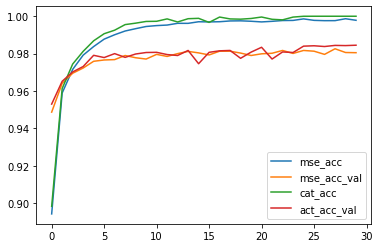

In [10]:
# 0.15% 정도 우수한것으로
import matplotlib.pyplot as plt
plt.plot(mse_model_hist.history['accuracy'])
plt.plot(mse_model_hist.history['val_accuracy'])
plt.plot(cat_model_hist.history['accuracy'])
plt.plot(cat_model_hist.history['val_accuracy'])
plt.legend(['mse_acc','mse_acc_val','cat_acc','act_acc_val'])
plt.show()

In [11]:
# 손실함수의 최저점을 찾아주는 옵티마이저
# 모멘텀 / 학습률을 개선하는 아이디어로 발전
# 학습률을 개선하는 옵티마이져
# SGD
# Adagrad : 이전 그레이디언트를 누적한 정보를 이용하여 학습률을 설정하는 기법
# RMSprop : 이전 그레이디어트를 누적할때 오랜된 것의 영향력을 줄이는 정책응 사용
# Adam : RMSprop + 모멘텀을 적용하여 RMSprop을 개선

In [13]:
# SGD Adam Adagrade RMSprop 을 비교

In [16]:
from tensorflow.keras.optimizers import SGD, Adam,Adagrad,RMSprop
sgd_model=build_model(optimizer = SGD())
adam_model=build_model(optimizer = Adam())
adagrade_model=build_model(optimizer = Adagrad())
rmsprop_model=build_model(optimizer = RMSprop())

In [ ]:
batch_size = 128
n_epoch = 10
sgd_model_hist = sgd_model.fit(x_train, y_train,batch_size=batch_size,epochs=n_epoch)
adam_model_hist = adam_model.fit(x_train, y_train,batch_size=batch_size,epochs=n_epoch)
adagrade_model_hist = adagrade_model.fit(x_train, y_train,batch_size=batch_size,epochs=n_epoch)
rmsprop_model_hist = rmsprop_model.fit(x_train, y_train,batch_size=batch_size,epochs=n_epoch)

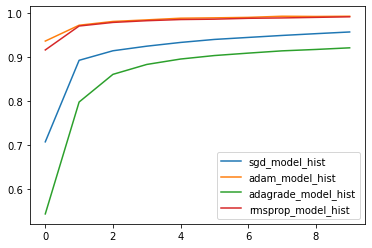

In [19]:
# 손실함수처럼 4개를 비교하는 그래프를 작성
plt.plot(sgd_model_hist.history['accuracy'])
# plt.plot(sgd_model_hist.history['val_accuracy'])
plt.plot(adam_model_hist.history['accuracy'])
# plt.plot(adam_model_hist.history['val_accuracy'])
plt.plot(adagrade_model_hist.history['accuracy'])
# plt.plot(adagrade_model_hist.history['val_accuracy'])
plt.plot(rmsprop_model_hist.history['accuracy'])
# plt.plot(rmsprop_model_hist.history['val_accuracy'])
plt.legend(['sgd_model_hist','adam_model_hist','adagrade_model_hist','rmsprop_model_hist'])
plt.show()